Goal : To make a model to predict if a patient(Female) is diabetic or not.

key Highlights of projects:
1. Threshold value was changed to reduce the FN or type 2 error.
2. 0 presented in dataset in place of null values are identified and replaced by the mean values.
3. Visualization is used for better understanding of the data.
4. No unnecessary data loss during implementation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Studying and cleaning the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
cols=list(df.columns)
for i in range(1,6):
    print(f"Number of zero value rows in {cols[i]}:-",df[df[cols[i]]==0].shape[0])

Number of zero value rows in Glucose:- 5
Number of zero value rows in BloodPressure:- 35
Number of zero value rows in SkinThickness:- 227
Number of zero value rows in Insulin:- 374
Number of zero value rows in BMI:- 11


In [6]:
# filling the zero values with mean
cols=list(df.columns)
for i in range(1,6):
    df[cols[i]]=df[cols[i]].replace(0,df[cols[i]].mean())

In [7]:
#hence no zero values left
cols=list(df.columns)
for i in range(1,6):
    print(f"Number of zero value rows in {cols[i]}:-",df[df[cols[i]]==0].shape[0])

Number of zero value rows in Glucose:- 0
Number of zero value rows in BloodPressure:- 0
Number of zero value rows in SkinThickness:- 0
Number of zero value rows in Insulin:- 0
Number of zero value rows in BMI:- 0


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


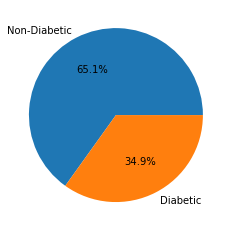

In [9]:
plt.pie(df["Outcome"].value_counts(),labels=["Non-Diabetic","Diabetic"],autopct="%1.1f%%")
plt.show()

In [10]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

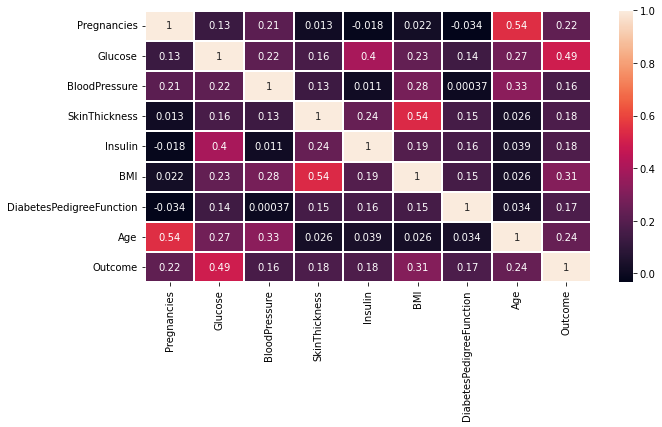

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,linewidths=2)
plt.show()

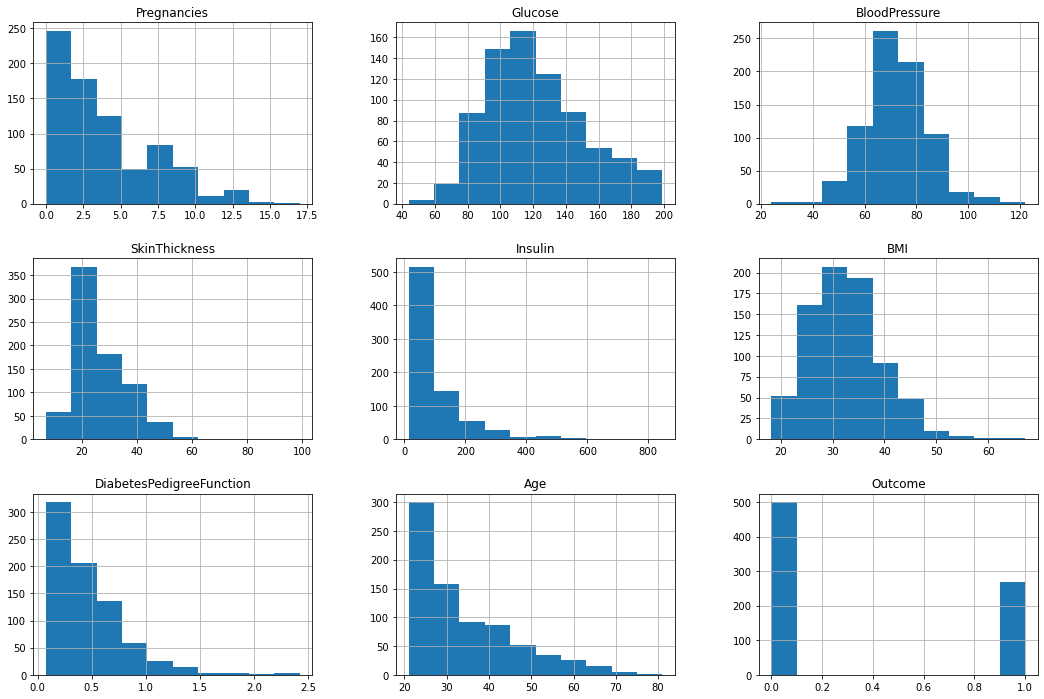

In [12]:
df.hist(figsize=(18,12))
plt.show()

# model building

In [13]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
ac = accuracy_score(ytest,ypred)
cm = confusion_matrix(ytest,ypred)
cr = classification_report(ytest,ypred)
ra = roc_auc_score(ytest,ypred)

print(f"Accuracy:- {ac}\n ROC:- {ra}\n\n {cm}\n {cr}")

Accuracy:- 0.7835497835497836
 ROC:- 0.742747784045125

 [[131  15]
 [ 35  50]]
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.77      0.59      0.67        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



In [14]:
train = logreg.score(xtrain,ytrain)
test = logreg.score(xtest,ytest)
print(f"Training Accuracy:- {train}\nTesting Accuracy:- {test}")

Training Accuracy:- 0.7783985102420856
Testing Accuracy:- 0.7835497835497836


In [15]:
print(f"Actual Values:-    {ytest[:35].values}")
print(f"Predicted Values:- {ypred[:35]}")

Actual Values:-    [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0]
Predicted Values:- [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0]


In [16]:
ypredprob = logreg.predict_proba(xtest)[:,1] # probability of a Patient for being Diabetic i.e for class 1

In [17]:
from sklearn.preprocessing import binarize
ypred = binarize([ypredprob], threshold=0.3)[0]

ac = accuracy_score(ytest,ypred)
cm = confusion_matrix(ytest,ypred)
cr = classification_report(ytest,ypred)
ra = roc_auc_score(ytest,ypred)
print(f"Accuracy:- {ac}\n ROC:- {ra}\n\n {cm}\n {cr}")

Accuracy:- 0.7748917748917749
 ROC:- 0.7899677679290895

 [[107  39]
 [ 13  72]]
               precision    recall  f1-score   support

           0       0.89      0.73      0.80       146
           1       0.65      0.85      0.73        85

    accuracy                           0.77       231
   macro avg       0.77      0.79      0.77       231
weighted avg       0.80      0.77      0.78       231



# Forecasting New Observation

In [18]:
def predictdiabetic():
    
    Pregnancies=int(input("Enter Number of Pregnancies:- "))
    Glucose = int(input("Enter Glucose level:- "))
    BloodPressure = int(input("Enter BloodPressure level:- "))
    SkinThickness = int(input("Enter SkinThickness:- "))
    Insulin = int(input("Enter Insulin level:- "))
    BMI = int(input('Enter BMI:- '))
    DiabetesPedigreeFunction = float(input("Enter DiabetesPedigreeFunction:- "))
    Age = int(input("Enter Age:- "))
    
    newob = [Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age]
    v = logreg.predict([newob])[0]

    if v==1:
        print("Yes, the patient is diabetic!!!")
    else:
        print("No, the patient is not diabetic!!")
    

In [19]:
predictdiabetic()

Enter Number of Pregnancies:- 2
Enter Glucose level:- 45
Enter BloodPressure level:- 100
Enter SkinThickness:- 25
Enter Insulin level:- 45
Enter BMI:- 30
Enter DiabetesPedigreeFunction:- 0.45
Enter Age:- 35
No, the patient is not diabetic!!
